## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [5]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report

## Do the two You Try problems from the lecture. 

- Open the Day13_LinearLogisticRegression.ipynb code and run it.
- Do the two you try problems to make sure you understand the models and over vs. under fitting.



---------------
## Linear and Logistic Regression - Day13 HW


Let's do an analysis of the Avocado Ripeness data from [https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset](https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset)

This is the same data from last class!

Explore some of the following research questions:

- Can you predict avocado firmness given one or more of the numerical features?
    - What model should you use here and why? (eg. Linear Regression vs Logistic Regression, Linear model vs. Nonlinear model)
    - Use appropriate numerical measures to talk about how good your model is (eg. for Linear Regression we would talk about MSE and $R^2$ but for Logistic Regression we might do a classification report)

- Can you predict whether or not an avocado is ripe based on one or more of the other features?
**NOTE - below I add a column for ripe 0/1** use this as your target.

     - What model should you use here and why? (eg. Linear Regression vs Logistic Regression, Linear model vs. Nonlinear model)
    - Use appropriate numerical measures to talk about how good your model is (eg. for Linear Regression we would talk about MSE and $R^2$ but for Logistic Regression we might do a classification report)


- In both cases play around with the models a little bit and see how you can get your best predictions!


NOTE - You should be able to look at the sns.pairplot() and say ahead of time which of the variables would be good for predicting either firmness or ripeness, just based on the shape of the graphs!


Please write up your conclusions.

**Your final notebooks should:**

- [ ] Be a completely new notebook with just the Day13 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] **Contain your "best models" for both questions ALONG WITH a discussion of what other things you tried and why these are your best results.**
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

In [6]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset")

print("Path to dataset files:", path)

# Note this downloads three files. We will use the second one.
file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file)
df['ripe'] = df['ripeness'].apply(lambda x: 1 if 'ripe' in x else 0)
df

Path to dataset files: /Users/sethchairez/.cache/kagglehub/datasets/amldvvs/avocado-ripeness-classification-dataset/versions/1


,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness,ripe
0,14.5,19,40,26,black,34,175,261,ripe,1
1,71.7,53,69,75,green,69,206,185,pre-conditioned,0
2,88.5,60,94,46,dark green,79,220,143,hard,0
3,93.8,105,87,41,dark green,75,299,140,hard,0
4,42.5,303,58,32,purple,63,200,227,breaking,0
...,...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard,0
246,21.6,17,36,19,black,47,182,240,firm-ripe,1
247,14.0,4,40,17,black,37,188,274,ripe,1
248,61.5,63,87,75,green,65,261,162,pre-conditioned,0


1.EDA(explore data) 


Look at my last homework for the exploratory data.

In [9]:
df.keys()

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness', 'ripe'],
      dtype='object')

# Using the first numeric value of size_cm3

In [11]:
features = ['size_cm3'] #,'weight_g','brightness']
target = 'firmness'

X = df[features]
y = df[target]


In [13]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

In [428]:
#Creating a pair plot to overall see the results

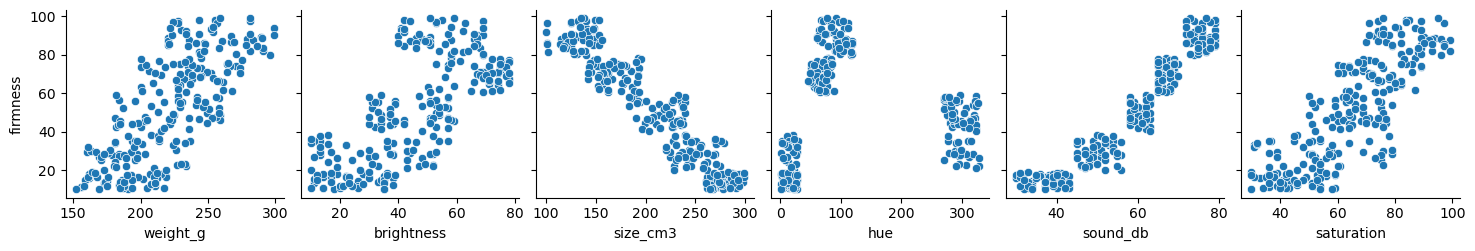

In [168]:
sns.pairplot(df, x_vars=['weight_g','brightness','size_cm3','hue','sound_db','saturation'], y_vars='firmness')

The most linear compared to firmness is the size in centimeter squared. Because of this we will focus on this graph first. The other variables that are either not linear or are very spread will gives us high mean squared erorrs.

# Preform a test train split on the data 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .2, random_state=42)

In [19]:
X_test

,size_cm3
142,158
6,237
97,247
60,226
112,192
181,120
197,237
184,156
9,142
104,145


In [439]:
#Creating the linear regression model.

In [21]:
model = LinearRegression()
model.fit(X_train,y_train.to_numpy().reshape(-1))

LinearRegression()

In [ ]:
# Finding the intercept and the Coefficient 

In [23]:
print("Intercept (w0):", model.intercept_)
print("Coefficient (w1):", model.coef_[0])

Intercept (w0): 147.47068135195954
Coefficient (w1): -0.46384718296118543


MSE on test set: 62.425
R² on test set: 0.907


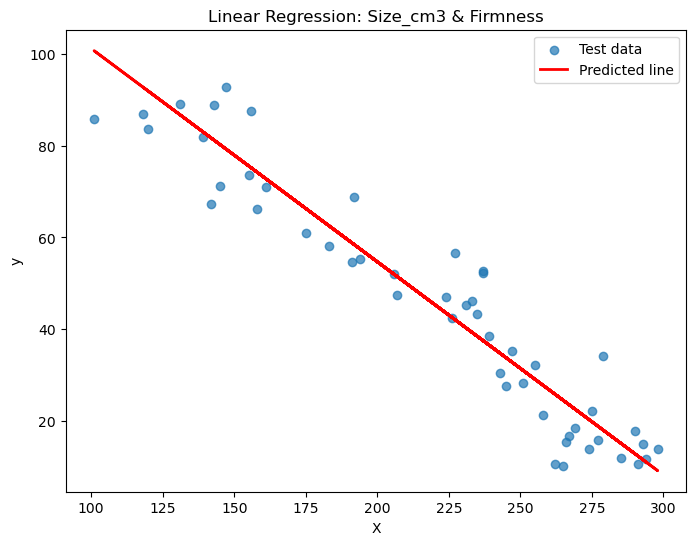

In [25]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.7, label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Size_cm3 & Firmness")
plt.legend()
plt.show()


According to the data, the variable size_cm3 is a good predictor for this data. The mean squared error of 62.4 means that predictions are within 8 firmness units of the real values. This is consistent with the amount of spread between all of the points. The R2 score tells us that the model displays about 90% variation of firmness throughout the model. Because most of the points that are on the graph are in line with the linear regression model, we can overall conclude that the red line fits the downward trend accurately.=

# Numeric value of weight_g

In [27]:
features = ['weight_g']#,'brightness']
target = 'firmness'

X = df[features]
y = df[target]


# Test-train_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .2, random_state=42)

In [31]:
X_test

,weight_g
142,258
6,187
97,214
60,182
112,245
181,291
197,229
184,283
9,232
104,235


In [488]:
#Creating the model

In [33]:
model = LinearRegression()
model.fit(X_train,y_train.to_numpy().reshape(-1))

LinearRegression()

In [35]:
print("Intercept (w0):", model.intercept_)
print("Coefficient (w1):", model.coef_[0])

Intercept (w0): -81.28454817878456
Coefficient (w1): 0.6030073964755533


MSE on test set: 309.665
R² on test set: 0.540


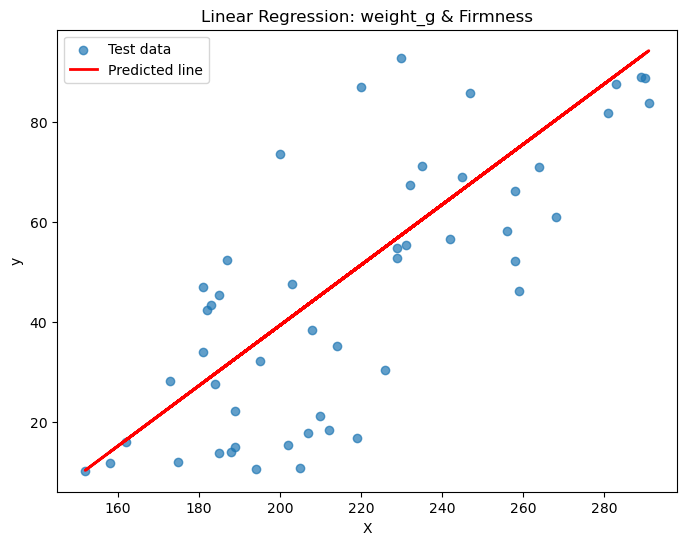

In [37]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.7, label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: weight_g & Firmness")
plt.legend()
plt.show()


This was graph was given as an example showing that the weight value is not actually a good predictor in this data. The mean squared error shows that predictions are off from actual values by 18 units. The data that is surrounding the line is spread out and does not get near it. The R2 score displays that there is only about 54% variation throughout the data, which is low considering a large spread in data. We can overall conclude that weight does not correlate with the firmness of the Avacado, therefore making it a bad predictor. 

# Numeric value of sound_db 

In [39]:
features = ['sound_db']
target = 'firmness'

X = df[features]
y = df[target]
#Test train split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .2, random_state=42)

In [41]:
model = LinearRegression()
model.fit(X_train,y_train.to_numpy().reshape(-1))

LinearRegression()

In [43]:
print("Intercept (w0):", model.intercept_)
print("Coefficient (w1):", model.coef_[0])

Intercept (w0): -58.877270248727825
Coefficient (w1): 1.8944447908430044


MSE on test set: 58.972
R² on test set: 0.912


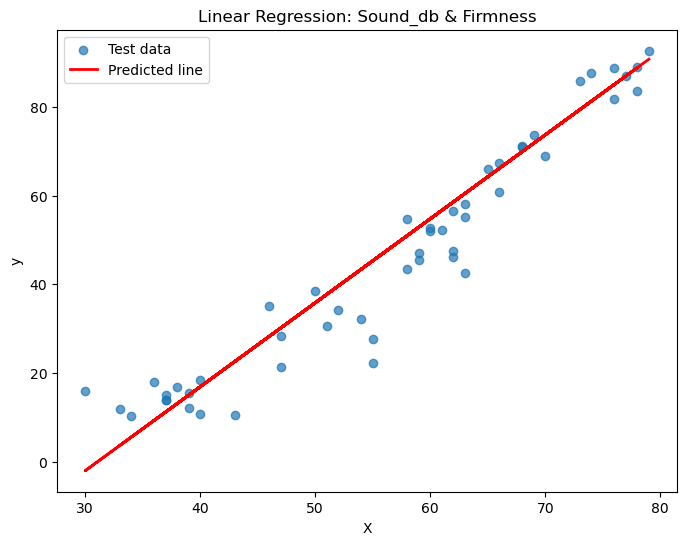

In [45]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.7, label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Sound_db & Firmness")
plt.legend()
plt.show()


Based on this graph we can see that the numeric value of sound_db is good in predicting the firmness. The Mean Squared Error of 58.9 informs us that some of the points are 5-10 units away. The r2 shows us that the model predicted about 91% variance throughout the data. Due to the points lying close to the linear regression model we can conclude that their is a strong linear correlation within this graph. Sound is a good predicator of the firmness.  

# Ripeness

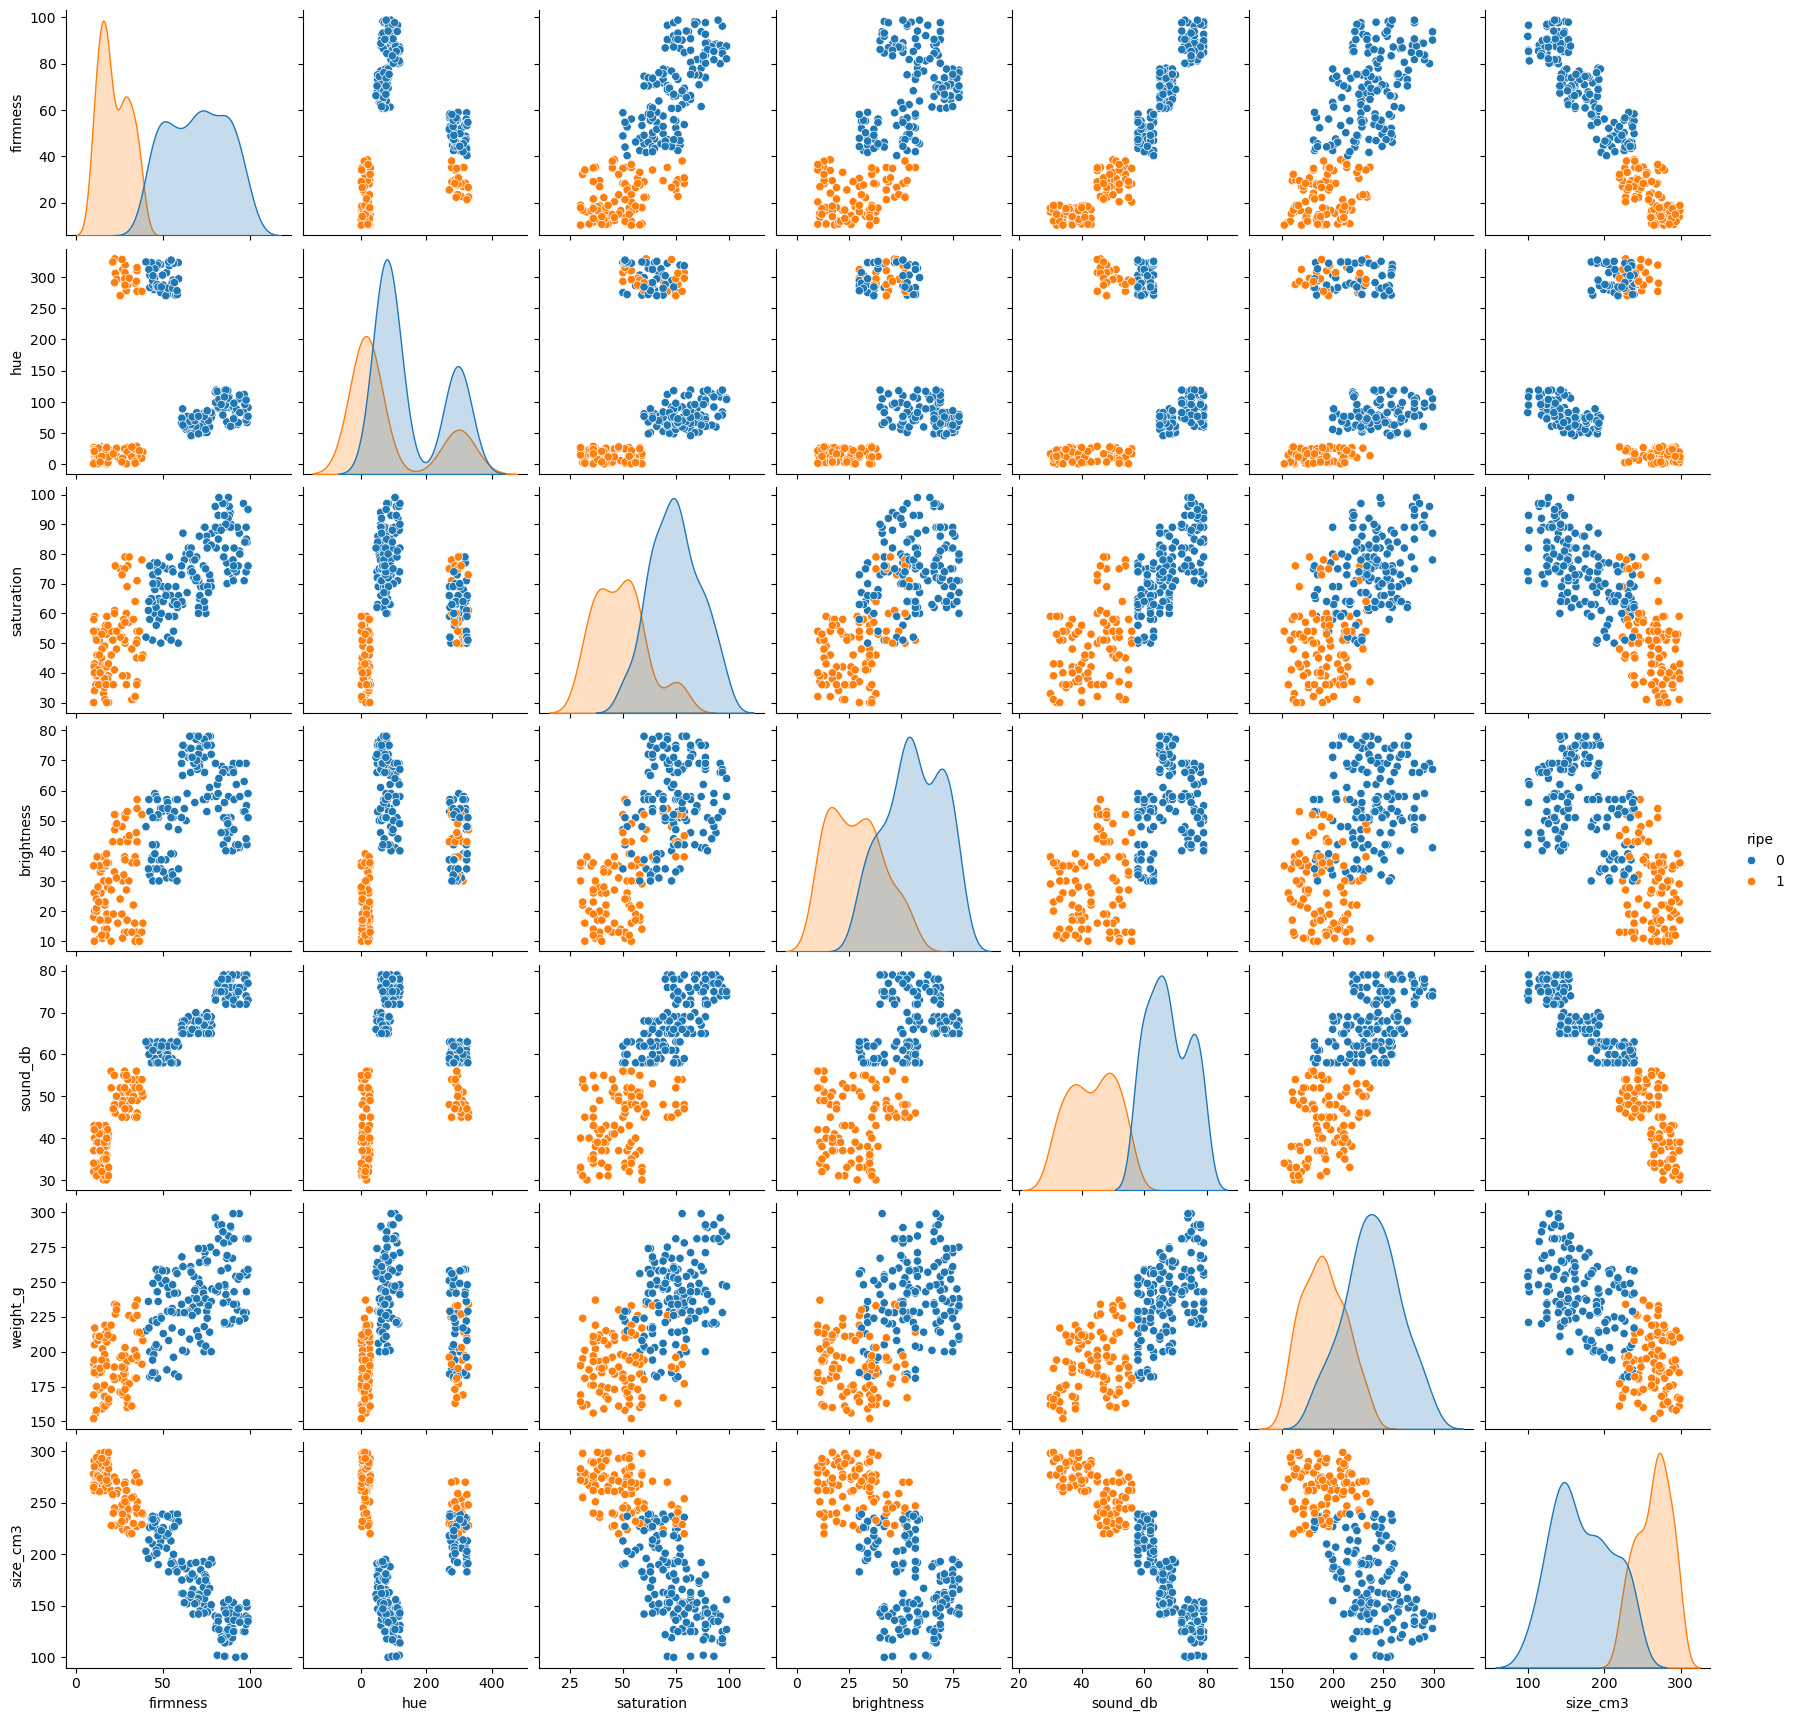

In [374]:
sns.pairplot(df, hue = 'ripe')

In [ ]:
Based on this graph, we want to find the variables that have the most linear relationship between each other. Off of initial glance firmness 

In [376]:
df['ripe'].value_counts()

ripe
0    150
1    100
Name: count, dtype: int64

In [378]:
df.keys()

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness', 'ripe'],
      dtype='object')

In [111]:
x_cols = ['size_cm3','brightness']#'sound_db','firmness']#'brightness','sound_db','weight_g','size_cm3']
y_cols = ['ripe'] 

X = df[x_cols]
y = df[y_cols]

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

X_train


,size_cm3,brightness
132,144,58
225,183,48
238,125,66
119,236,53
136,262,10
...,...,...
106,138,59
14,236,52
92,192,68
179,239,54


In [113]:
df

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness,ripe
0,14.5,19,40,26,black,34,175,261,ripe,1
1,71.7,53,69,75,green,69,206,185,pre-conditioned,0
2,88.5,60,94,46,dark green,79,220,143,hard,0
3,93.8,105,87,41,dark green,75,299,140,hard,0
4,42.5,303,58,32,purple,63,200,227,breaking,0
...,...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard,0
246,21.6,17,36,19,black,47,182,240,firm-ripe,1
247,14.0,4,40,17,black,37,188,274,ripe,1
248,61.5,63,87,75,green,65,261,162,pre-conditioned,0


In [115]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train) 

/Users/sethchairez/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [117]:
#Finding the Intercepts

In [119]:
print("Intercept (w0):", logreg.intercept_[0])
print("Coefficients (w1,w2):", logreg.coef_[0])

Intercept (w0): -28.124304834959343
Coefficients (w1,w2): [ 0.13416532 -0.07086744]


In [121]:
# poly = PolynomialFeatures(degree = 1,include_bias=False)
# X_train_poly = poly.fit_transform(X_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.960
Confusion Matrix:
[[26  2]
 [ 0 22]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.92      1.00      0.96        22

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Based on using the two variables of size and brightness we are able to get an overall accruay of 96% in predicting the data. When the model predicts not ripe, it is always correct. Out of all of the avacados that are not ripe, the model correctly predicted that 93% were in fact not ripe. This model is overall accruate in either predicting that Avacados are ripe or not ripe. On the other hand, the model was not as accurate in predicting the Avacados that were ripe. This is interesting because the overall accuracy of finding ripe avacados is 92% however the overall recall is 100%. The F1 score remains the same. 

In [158]:
x_cols = ['sound_db','firmness']#'sound_db','firmness']#'brightness','sound_db','weight_g','size_cm3']
y_cols = ['ripe'] 

X = df[x_cols]
y = df[y_cols]

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

X_train


,sound_db,firmness
132,69,75.6
225,59,53.3
238,73,90.5
119,59,53.7
136,56,20.3
...,...,...
106,73,98.8
14,45,28.3
92,69,69.4
179,63,49.8


In [160]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train) 

/Users/sethchairez/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [162]:
# poly = PolynomialFeatures(degree = 1,include_bias=False)
# X_train_poly = poly.fit_transform(X_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 1.000
Confusion Matrix:
[[28  0]
 [ 0 22]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        22

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Based on this data, we are able to strongly say that the sound of the Avacado and the Firmness of the Avacado are the best predictors in predicting the firmness. This table displays 100% accuracy in all categories of its prediction. 

# Write up

Overall, predicting the firmness in relation to the ripeness of the Avacado are similar. The best values to use in order to predict the firmness of the Avacados are the size and the sound of the Avacado. There is a strong negative and positive linear relationship between these two values. With a MSE of 62 and R2 score of .90, the overall variance within the data is strong along with the linear correlation. In addition to this, a .51 MSE for the sound and R2 score of .91 displays that the variance is also strong however the model has more variance throughout its value, making it better at predicting unknown values. In determining the ripeness, the predictors that give us 100% accuracy are the sound and the firmness. If we were to take these findings into the real world, it is safe to say that we can strongly inform that the sound and firmness of the Avacado are thw two most important factors in determining how ripe an Avacado is. 